 # Survival Analysis - Kaplan Meier Estimates


 # Heart Failure Prediction
    
   Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives
   each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this
   dataset contains 12 features that can be used to predict mortality by heart failure.

   Most cardiovascular diseases can be prevented by addressing behavioral risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

   People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk
   factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and
   management wherein a machine learning model can be of great help.
    


    
 ## Dataset Link

[1] https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5#Sec2

[2] https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001#sec010

 ## Dataset Description

 Feature | Explanation | Measurement	| Range
------------- | ------------- |------------- | -------------
Age	|Age of the patient	|Years |	[40,..., 95]
Anaemia	|Decrease of red <br> blood cells or hemoglobin |	Boolean|	0, 1
High blood pressure |	If a patient has hypertension |	Boolean	 |0, 1
Creatinine phosphokinase<br>(CPK) |	Level of the CPK enzyme <br>in the blood |	mcg/L|	[23,..., 7861]
Diabetes|	If the patient has diabetes |	Boolean	| 0, 1
Ejection fraction|	Percentage of blood leaving<br>the heart at each contraction|Percentage	|	[14,..., 80]
Sex	| Woman or man |	Binary|	0, 1
Platelets|	Platelets in the blood|	kiloplatelets/mL|	[25.01,..., 850.00]
Serum creatinine|	Level of creatinine in the blood|	mg/dL|	[0.50,..., 9.40]
Serum sodium|	Level of sodium in the blood|	mEq/L|	[114,..., 148]
Smoking|	If the patient smokes|	Boolean	|0, 1
Time|	Follow-up period|	Days|	[4,...,285]
DEATH EVENT<br>(TARGET)|	If the patient died during the follow-up period|	Boolean|	0, 1

**NOTE: mcg/L: micrograms per liter. mL: microliter. mEq/L: milliequivalents per litre**

 ### References

    Machine learning can predict survival of patients with heart failure from serum creatinine and
    ejection fraction alone. (03 February 2020)
   https://doi.org/10.1186/s12911-020-1023-5

### Install Required Libraries

In [1]:
# For survival analysis, we will use the lifelines library which exclusively
# supports survival analysis functions and estimates.

# Reference:

#  [1] https://lifelines.readthedocs.io/en/latest/index.html
#  [2] https://lifelines.readthedocs.io/en/latest/fitters/univariate/KaplanMeierFitter.html

# Uncomment the folowing statement if there is an error importing KaplanMeierUtils in the next cell.
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=dc6fffee781fb288c5ffa2d2fc905c014e26cc46ed28334a5a4e0b11e7f566a7
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


### Required Libraries and Utilities

In [2]:
# Import the required libraries & modules
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ReusableUtils import ReusableUtils
utils = ReusableUtils()

from SurvivalAnalysisUtils import KaplanMeierUtils
kmUtils = KaplanMeierUtils()

### Set Notebook Configuration Parameters

In [3]:
utils.setNotebookConfigParams()

/content/ReusableUtils.py:59: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



### Import Data

In [4]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = './heart_failure_clinical_records_dataset.csv',
                                 low_memory = False,
                                 skipinitialspace = True,
                                 float_precision = 'round_trip')

heart_faliure_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
heart_faliure_data.shape

(299, 13)

In [6]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


***This looks to be a clean dataset without any missing values...***

In [7]:
heart_faliure_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# Survival Analysis - Kaplan Meier Estimates

*Kaplan-Meier estimate is one of the best options to be used to measure the fraction of subjects living for a certain amount of time after treatment. In clinical trials or community trials, the effect of an intervention is assessed by measuring the number of subjects survived or saved after that intervention over a period of time. The time starting from a defined point to the occurrence of a given event, for example death is called as survival time and the analysis of group data as survival analysis.*

*The Kaplan-Meier survival curve is defined as the probability of surviving in a given length of time while considering time in many small intervals. There are three assumptions used in this analysis.*

1. At any time patients who are censored have the same survival prospects as those who continue to be followed.
2. The survival probabilities are the same for subjects recruited early and late in the study.
3. The event happens at the time specified.

The Kaplan-Meier estimate is also called as **“product limit estimate”**. It involves computing of probabilities of occurrence of event at a certain point of time. We multiply these successive probabilities by any earlier computed probabilities to get the final estimate.



For each time interval, survival probability is calculated as the number of subjects surviving divided by the number of patients at risk. Subjects who have died, dropped out, or move out are not counted as “at risk” i.e., subjects who are lost are considered “censored” and are not counted in the denominator.

**References:**

1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3059453/
2. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3932959/
3. https://www.tandfonline.com/doi/abs/10.1080/01621459.1958.10501452

## 1. Categorical Features

1. anaemia
2. high_blood_pressure
3. diabetes
4. sex
5. smoking
6. DEATH_EVENT

## 2. Continuous Features

1. age
2. creatinine_phosphokinase
3. ejection_fraction
4. platelets
5. serum_creatinine
6. serum_sodium
7. time

**Kaplan Meier survival curves are constructed for all the variable to study how over time they affect the survival of the population.**

In [8]:
categorical_columns = ['anaemia','diabetes', 'high_blood_pressure','sex','smoking']

continuous_columns = ['age','creatinine_phosphokinase','ejection_fraction',
                      'platelets','serum_creatinine','serum_sodium','time']

### Categorical Features

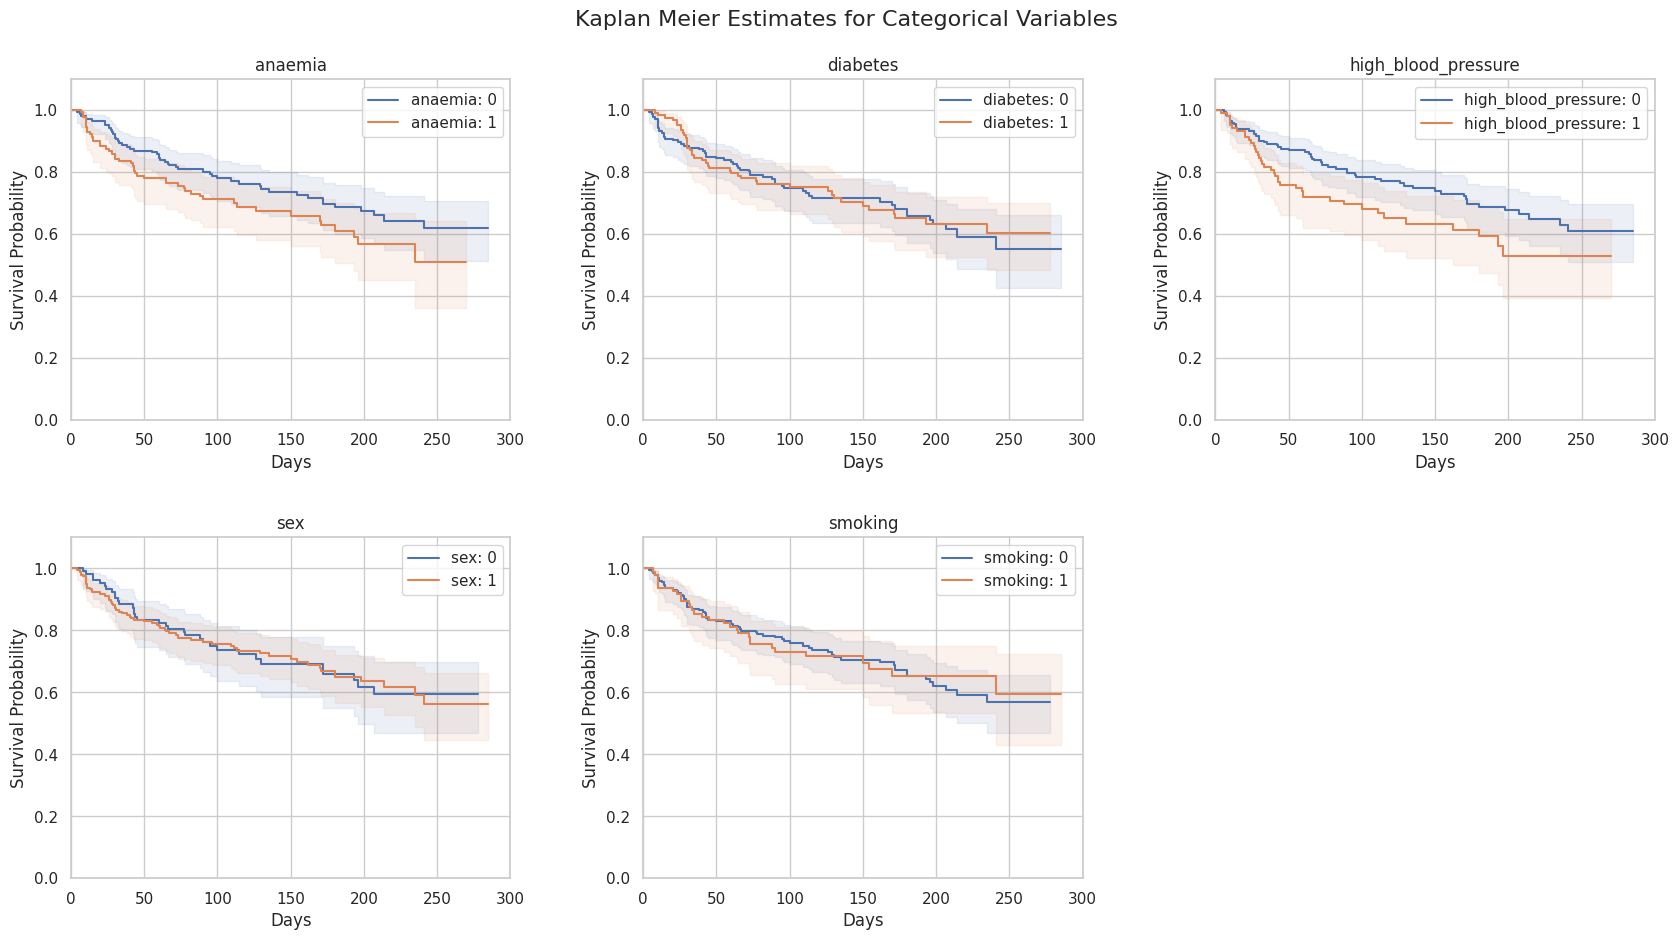

In [9]:
kmUtils.PlotKaplanMeierEstimatesForCategoricalVariables(data=heart_faliure_data,
                                                        categorical_columns=categorical_columns)

### Categorical Insights
<br>------------</br>
1. **Anaemia:** Anemia is common in patients with heart failure, and is a multifactorial and multidimensional problem. A condition in which the number of red blood cells or the haemoglobin concentration is lower than normal thereby reducing the capacity of the blood to supply oxygen to the cells and tissues. The KM estimate plot for anaemia shown a decreased probability for survival if the person is know to be anaemic.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
2. **Diabetes:** Diabetes is known to trigger heart failure conditions and patients with diabetes are at an increased risk of developing heart failure symptoms at initial stages. However, the KM estimate curve for diabetes and survival probability shows almost comparable trend for both diabetic and non-diabetic patients making diabetes a non-significant factor. This could be due to the fact that the population considered as part of this study (dataset) had Left Ventricular Systolic Dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
3. **High Blood Pressure:** High BP adds to your heart’s workload: Narrowed arteries that are less elastic make it more difficult for the blood to travel smoothly and easily throughout your body — causing your heart to work harder. The KM estimate curve also shows a similar trend where patients with high blood pressure (hypertension) are at an increased risk of survival due to heart failure with significant lower survival probability.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
4. **Sex:** The incidence and prevalence of heart failure is lower in women than in men at all ages. However, due to the steep increase in incidence with age, and the proportionally larger number of elderly women in the populations of the developed world, the total number of men and women living with heart failure is similar. The KM estimate curve also shows a similar trend and since the population under consideration are at an advanced stage of heart failure, the survival probability curve shows similar trend for both men and women.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
5. **Smoking:** Smoking is a major risk factor for developing initial stages of ischemic heart disease, a condition in which plaque builds up inside the coronary arteries. People who smoke are at an increased risk of developing heart failure condition. However, the KM estimate curve for smoking and survival probability shows almost comparable trend for both smokers and non-smokers making smoking a non-significant factor. This could be due to the fact that the population considered as part of this study (dataset) had Left Ventricular Systolic Dysfunction and had previous heart failures that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure.

<br>------------</br>

Thus, from the KM estimates for categorical features, **`Anemia`** and **`High Blood Pressure`** are known to have a major impact on the survival probability of patients who are at an advanced stages of heart failure condition.

### Continuous Features

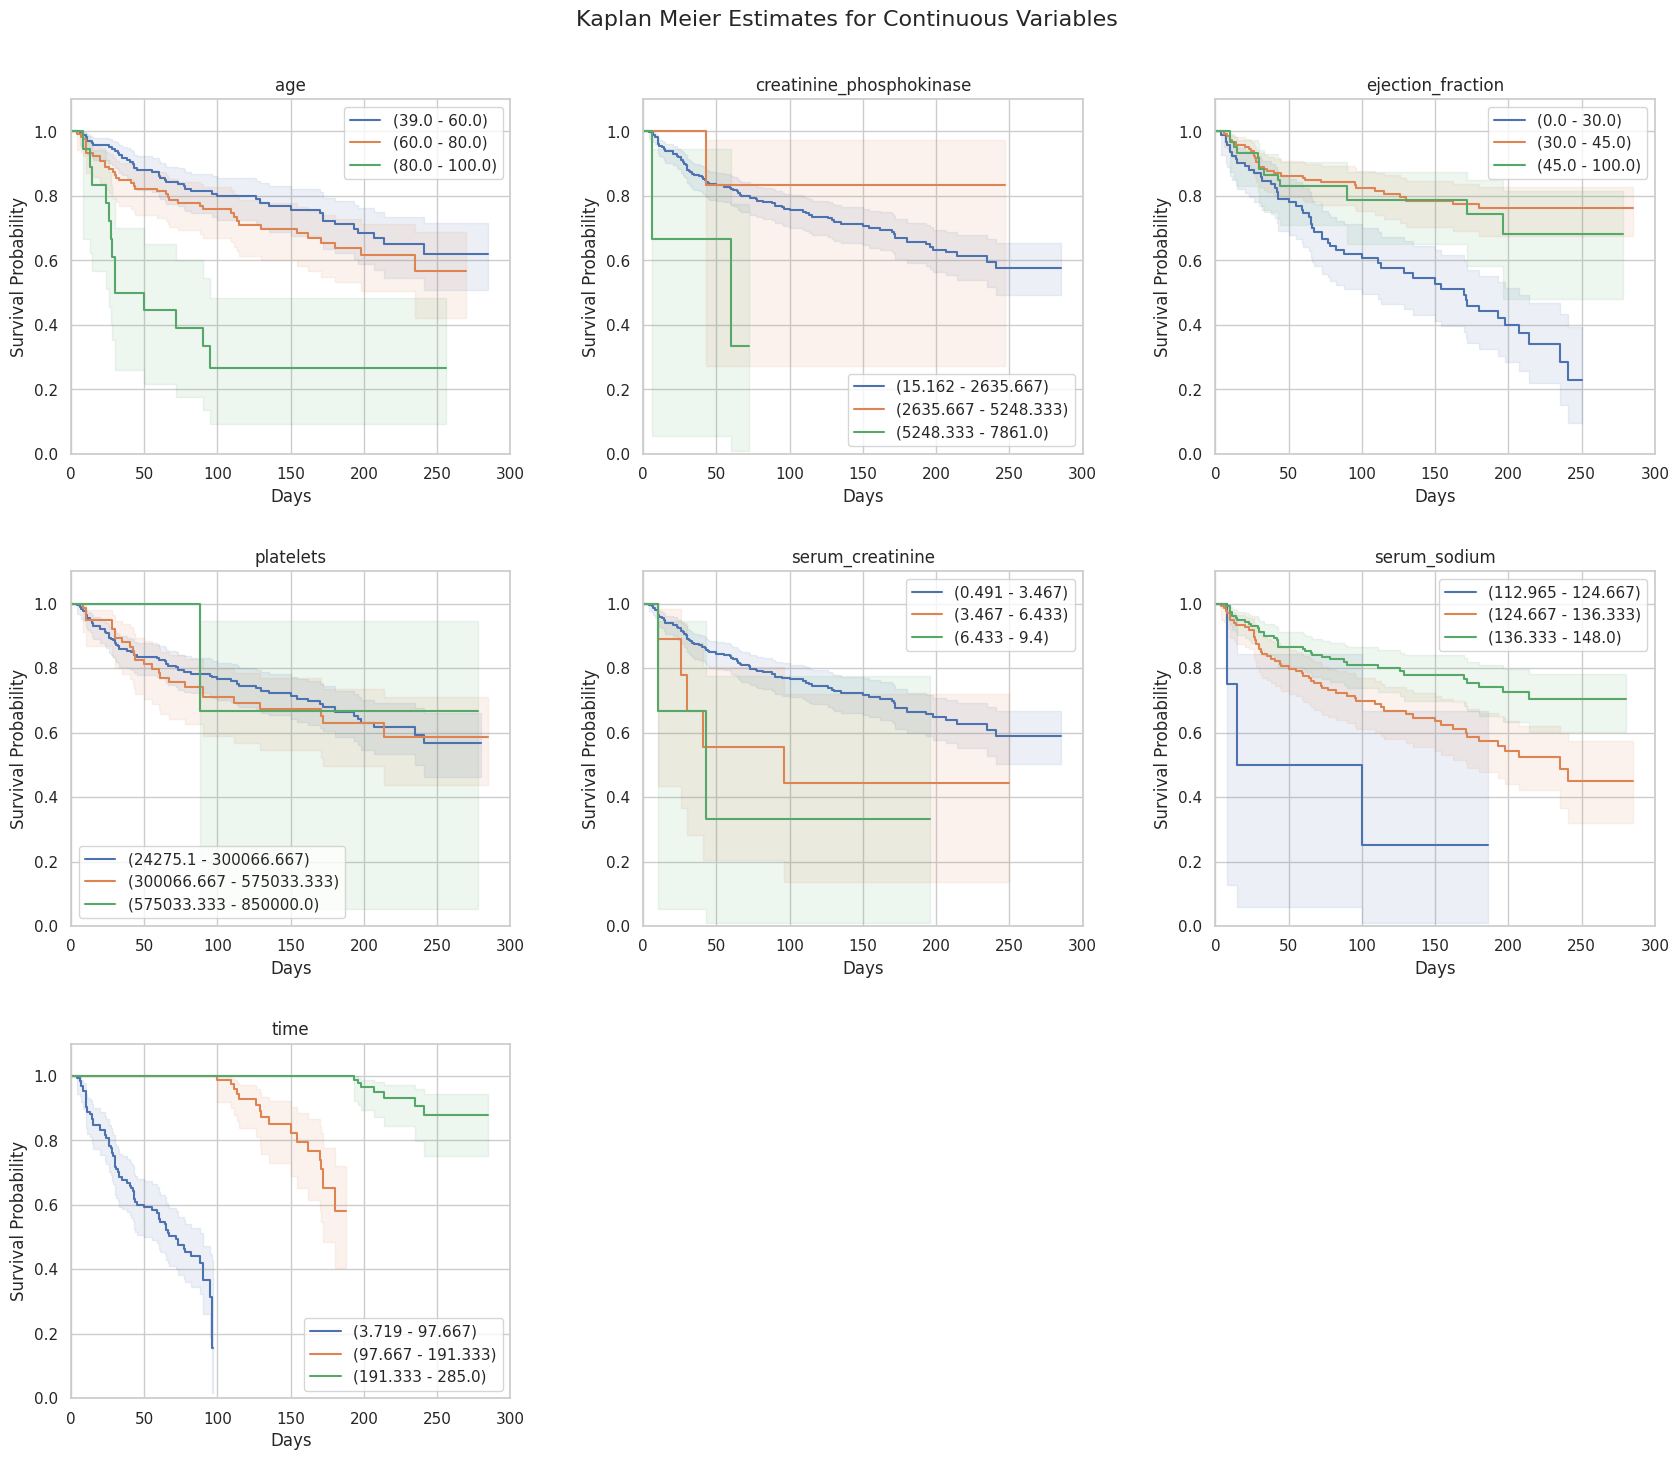

In [10]:
kmUtils.PlotKaplanMeierEstimatesForContinuousVariables(data=heart_faliure_data,
                                                       continuous_columns=continuous_columns)

### Continuous Insights
<br>------------</br>
1. **Age:** The age of the population under consideration ranges from [40 - 95]. So in-order to create age groups, 3 separate bins are creates - **[39 - 60]**, **[60 - 80]**, and **[80 - 100]**. KM estimate curves were created for the 3 categories which basically showed the survival probability for the [80 - 100] group is the least. The survival probability for the groups [39 - 60] and [60 - 80] are almost similar with [60 - 80] having a slightly lower chances of survival.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
2. **Creatinine_Phosphokinase (CPK):** The CPK values for the population is spread out in the range [23,..., 7861]. High levels of CPK typically indicate a sort of elevated stress to the heart muscles indicating either myocardial muscle damage, electrical injury, or heart attack. This entire range was separated into 3 different bins of **[15.162 - 2635.667]**, **[2635.667 - 5248.333]**, and **[5248.333 - 7861.0]**. The survival probability stands lowest for the higher bucket of [5248.333 - 7861.0]. However, the majority of the population seems to be falling into the 1st bucket range of [15.162 - 2635.667] who have a decent chance of surviving. This makes CPK levels some what insignificant.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
3. **Ejection Fraction (EF):** EF is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. The EF range for the population under consideration in [14,..., 80]. To study the survival probability the EF range was converted into buckets of **[0 - 30]**, **[30 - 45]**, and **[45, 100]**. KM estimate curves were plotted for all the 3 buckets. Population falling under the bucket [0 - 30] show the least chance of surviving a heart failure condition. The remaining 2 buckets show a comparable and decent chance of survival.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
4. **Platelets:** Heart failure is associated with increased risk of venous thromboembolism, stroke, and sudden death. A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. The platelets count for the population ranges from [25100 - 850000] which was divided into 3 buckets for KM estimate curves. All the 3 groups of platelets range show a comparable and decent survival probability. This is indicative that platelets could be an insignificant feature for predicting the survival probability and death prediction.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
5. **Serum Creatinine:** Creatinine is a chemical waste product in the blood that passes through the kidneys to be filtered and eliminated in urine. Heart failure condition usually report an increase in serum creatinine levels in the scale of ≥ 0.3 mg/dL. The range of serum creatinine levels for the population ranges from [0.5 - 9.4] which was divided into 3 buckets - **[0.49 - 3.46]**, **[3.46 - 6.43]**, and **[6.43 - 9.4]** for KM estimate curves. The curve for the 3rd bucket showed the least survival probability followed by the 2nd and 1st buckets respectively. This makes it evident that increased serum creatinine levels pose a good amount of during heart failure conditions.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
6. **Serum Sodium:** Hyponatremia or low serum sodium level is one of the crucial factors in the clinical prognosis and a common biochemical disorder featured in heart failure patients. A normal blood sodium level is between 135 - 145 milliequivalents per liter. The range of serum sodium levels for the population ranges from [113	- 148] which was divided into 3 buckets - **[113 - 124]**, **[124 - 136]**, and **[136 - 148]** for KM estimate curves. From the KM plots, it is observed that survival probability is least for population falling under the 1st bucket with extremely low sodium levels (However, it looks like there are not many people falling into this bucket.). Bucket 2 and bucket 3 population showed better probability with population falling under bucket 3 having the normal sodium levels and the best chances of survival a heart failure condition.
<br>---------------------------------------------------------------------------------------------------------------------------------------------------------------------------</br>
7. **Time:** The time column denotes the follow-up time for a patient. Follow-up time can be interpreted as a **time to event** where the event in this case would be **DEATH** or the patient becoming **censored**. So, time can be interpreted as a target column predicting the **time to death** in case of survival analysis for a patient with heart failure condition. Follow-up time is **highly correlated** to the DEATH event because the death of a patient would directly impact the time value. As we also observe in the KM estimate plots for time, the curve with least time bucket show a very poor chances of survival. However, this could be due to the fact that the person died and thus the follow-up time is less. For the remaining 2 buckets with higher values of time, the person have either survived the heart failure condition OR might have left the study mid way (censored) and have not returned for a follow-up.


<br>------------</br>

Thus, from the KM estimates for continuous features, **`Ejection Fraction`**, **`Serum Creatinine`**, and **`Time`** are known to have a major impact on the survival probability of patients who are at an advanced stages of heart failure condition.